<h1>A nulladik kvantumszámítógépes programom Qiskittel</h1>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $

<h2>A kvantumáramkörök</h2>

<h3>Az alapok</h3>
Itt egy egyszerű áramkört hoznuk létre, 1 kvantumbittel és 1 klasszkus bittel. A kvantumbiten egy X kapuval hatunk, majd megmérjük a bit állapotát.

In [1]:
#
# A kvantumáramkörök kvantum és klasszikus bitekből állnak Qiskitben 
#

# Először importáljuk a szükséges könyvtárakat a qiskit könyvtárból 
# - QuantumRegister: a kvantumbitek
# - ClassicalRegister: a klasszikus bitek
# - QuantumCircuit: a kvantumáramkör
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# Kvantumregiszterekben tároljuk a kvantumbiteket
qReg = QuantumRegister(1, "qbit") # 1 kvantumbit, "qbit" névvel (ez opcionális)

# Hogy kinyerjük a kvantumbit állapotát meg kell mérni, ennek a mérésnek az eredménye egy klasszikus bit
cReg = ClassicalRegister(1, "classical") # 1 klasszikus bit (0/1) tárolása, "classical" névvel (ez opcionális)

# Most létrehozhatjuk a kvantumáramkört, ami kvantum és klasszikus regiszterekből áll
quantum_circuit = QuantumCircuit(qReg, cReg) # Létrehozzuk a kvantumáramkört, itt több regisztert is hozzá lehet adni

# ---------------------------
# Most műveleteket végezhetzünk = kapukkal hatunk az áramkörre
quantum_circuit.x(qReg[0]) # Egy X kapuval hatunk a qvantumbiten
#Megj.: itt a kvantumbit sorszámát is megadhatjuk pl.: quantum_circuit.x(0) (Az indexelés 0-tól kezdődik)

# Hogy kinyerjük az eltárolt információt ki kell mérni a qbit(eket)
quantum_circuit.measure(qReg[0], cReg[0])
#Megj.: Itt is elég megadni a kvantum és a klasszikus bit sorszámát pl.: quantum_circuit.measure(0, 0)

# Opcionális: kiírja, hogy Eklészült a kvantumáramkör
print("Eklészült a kvantumáramkör")

Eklészült a kvantumáramkör


<h3>Az áramkör megjelenítése</h3>
Hasznos hogy látjuk a elkészült áramkört egyben.

Kétféleképpen ábrázolhatjuk a kvantumáramköröket:

In [2]:
# Qiskitben, hogy megjelenítse az áramkört a draw() függvényt használhatjuk
# Alapértelmezetten ASCII ábraként rajzolja ki:
quantum_circuit.draw() # Kirajzolja az áramkört

┌───┐┌─┐
       qbit: ┤ X ├┤M├
             └───┘└╥┘
classical: 1/══════╩═
                   0

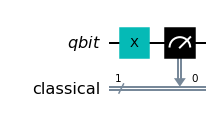

In [3]:
# Matplotlib segítségébel is kirajzolhatjuk ugyanazt az áramkört:
quantum_circuit.draw(output="mpl") # Kirajzolja az áramkört
# Megj.: Lehet, hogy ennek a megjelenítéséhez valamilyen egyéb csomagot is le kell tölteni

<img src="https://raw.githubusercontent.com/gubazoltan/KvantumSzakkor_2022/afc966e11f484c90ae9804d478d1c0d1d8f3f8fd/szakkor_files/python_qiskit_figures/basic_circuit.png" width="400">

A vízszintes vonal(ak) a kvantumbit(ek), a vízszintes duplavonal(ak) a klasszikus bit(ek)et jelölik. Ezeken balról jobbra hajtja végre a kapukat a számítógép.

A kapukat téglalpokkal rajzolja, a méréseket összeköti a klasszikus bitekkel.

A kvantumbitek alapértelmezetten a 0 állapotban vannak, amit $\ket{0}$ jelkülünk, ezt a jelkölést <b>ket</b>nek hívjuk.

Az áramkör létrehoz egy $\ket{\Psi}$ kvantumállapotot (ugyan azt a mérés ezt megváltoztatja) de a mérés előtt többféleképpen is megjeleníthetjük.

Az egybites kvantumállapot lehet a 2 bázisállapot valamilyen szuperpozíciójában is:
$$\ket{\Psi} = \alpha\ket{0}+\beta \ket{1},$$
ahol $\alpha, \beta\in\mathbb{R}$ és $\alpha^2+\beta^2=1$ (vagyis a kvantumállapotok 1-re normáltak)

*Megjegyzés (haladó): $\alpha$ és $\beta$ lehetnek komplex számok is, de azokat nem haszáljuk a kurzus sorám, így ismeretük nem szükséges most.*

<h3>Az állapotvektor ábrázolása</h3>

Az állapotvektort a Qiskit visszaadja:

In [4]:
from qiskit.quantum_info import Statevector # Elmenti az állapotvektort (csak az állapot megjelenítéséhez kell)

qc = QuantumCircuit(1) # Létrehoz egy 1 kvantumbitből álló áramkört
qc.h(0) # Hat a biten egy H kapuval

state = Statevector(qc) # Elmenti az állapotot

In [5]:
state.draw(output="latex") # Kiírja az állapotvektort

<IPython.core.display.Latex object>

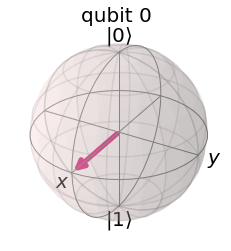

In [6]:
from qiskit.visualization import plot_bloch_multivector # A Bloch-gömböt importálja
plot_bloch_multivector(state) # Kirajzolja a Bloch-gömböt

<h3>Futtatás</h3>
A kvantumáramköröket futtathatjuk szimulátoron vagy valódi kvantumszámítógépen. Most a szimulátort fogjuk használni a futtáshoz.

*A ma elérhető kvantumszámíógépek meglehtősen zajosak (hibásak), továbbá a bitek száma is korlátozott.*

In [7]:
# Futtatáshoz tobábbi dolgokat kell importálni
# - execute: a függvény, ami lefuttatja a szimulációt
# - Aer: a szimulációs könyvtár
from qiskit import execute, Aer

# Először egy folyamatot (job) hozunk létre a futtatáshoz, a praméterek:
#   1. az áramkör amit futtatni szeretnénk
#   2. ami a szimulációt futtatja - itt a szimulátor (klasszikus számítógépen)
#   3. hányszor futtassa le a szimulációt
job = execute(quantum_circuit, Aer.get_backend('aer_simulator'), shots=1024)

# A futtatás után kinyaerjük a mérések eredményét
# Ez egy 'dictionary'-t ad vissza:
#   - kulcs: a mért bitsztring (string)
#   - érték: a mért bitsztring gyakorisága (int)
counts = job.result().get_counts(quantum_circuit)

print(counts) # Kiírjuk az eredményt

{'1': 1024}


1-et mértünk 1024 alkalommal.

*Valódi kvantumszámítógépen a hibák miatt általában 1-et, de néhány alkalommal 0-t is mérnénk.*

Az eredményt hisztogramon is ábrázolhatjuk:

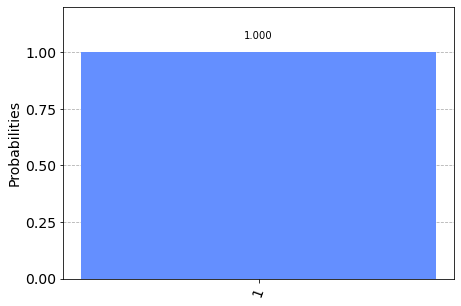

In [8]:
# Importáljuk a hisztogramot kirajzoló függvényt
from qiskit.visualization import plot_histogram
plot_histogram(counts) # Ábrázoljuk hisztogramon az eredményt

<h2>A több kvantumbites áramkörök</h2>
A kvantumszámítógépek előnyeinek a kihasználása érdekében általában több kvantumbites áramköröket használunk.

Létrehozunk egy 3 kvantumbites áramkört. Az első két kvantumbiten hatunk 1-1 X kapuval, majd megmérjük az áramkört.

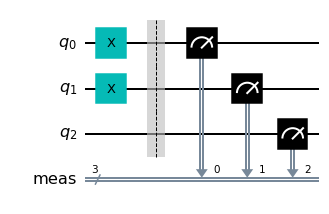

In [9]:
# importálja a szükséges könyvtárakat
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector # Elmenti az állapotvektort (csak az állapot megjelenítéséhez kell)

qc = QuantumCircuit(3) # Létrehozza az áramkört 3 kvantumbittel, itt nem adunk hozzá klasszikus regisztert

qc.x(0) # Az 1. biten hat egy X kapuval
qc.x(1) # A 2. biten hat egy X kapuval

state = Statevector(qc) # Elmenti az állapotot

qc.measure_all() # Hozzáad egy mérést
# FONTOS: ha a mesure_all() függvényt használjuk nem kell az áramkör létrehozásakor hozzáadni a klasszikus regisztereket

display(qc.draw(output="mpl")) #Kirajzolja a mérés eredményét, a display() olyan mint a print() függvény, csak ez ábrákat is ki tud rajzolni

{'011': 1024}


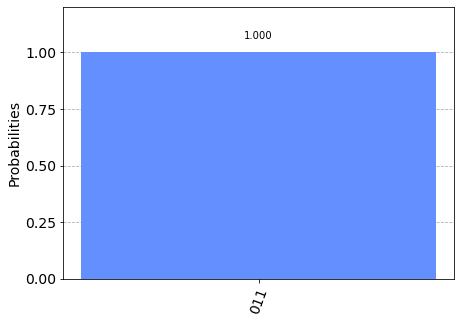

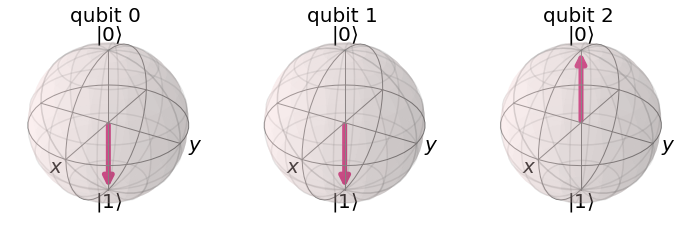

In [10]:
job = execute(qc, Aer.get_backend("aer_simulator")) # Létrehozza a folyamatot
counts = job.result().get_counts(qc) # Kinyeri a mérés eredményét
print(counts) # Kiírja a mérés eredményét
display(plot_histogram(counts)) # Ábrázolja hosztogramon a mérés eredményét
plot_bloch_multivector(state)

<font color="red" style="font-size:44px;"><b> A mérés eredménye 011, pedig 110-t vátunk! </b></font>


<font style="font-size:30px;"><b> Mivel a Qiskit lentről fölfelé számozza a kvantumbiteket! </b></font>

Ezt megfordíthatjuk:

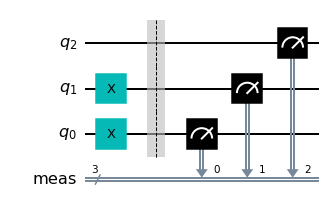

In [11]:
qc.draw(output="mpl", reverse_bits=True)

Vagy a mérés eredményét fordíthatjuk meg:

In [12]:
job = execute(qc, Aer.get_backend("aer_simulator")) # Létrehozza a folyamatot
counts = job.result().get_counts(qc) # Kinyeri a mérés eredményét
print(counts) # Kiírja a mérés eredményét

# A mérés eredményét a programmal megrordíthatjuk:
result = list(counts.keys())[0] # A dictionary kulcsai közül kinyerjük az első elemet
print("A mérés eredménye:", result) # Kirja az eredményt
print("Az eredmény megfordítva:", result[::-1]) # Kirja az eredményt megfordítva

{'011': 1024}
A mérés eredménye: 011
Az eredmény megfordítva: 110


<h2>További fontos kvantumkapuk</h2>
A kvantumbiteken különféle műveleteket hajthatunk végre. Minegyik egybites művelet egy forgatásnak felel meg a Bloch-gömbön.

<i>Ha ezeket még nem érted teljesen ne aggódj! A következőkben be fogod gyakorolni, hogy hogyan lehet ezeknek a kapuknak a segítségével kvantumáramköröket szimulálni. Majd a szakkör előrehaladtával egyre jobban meg fogod érteni a kapuk működését.</i>

<h3>Pauli-kapuk</h3>

Ezek a kapuk onnan kapták a nevüket, hogy az X kapu az $x$ tengely körüli $\pi$-vel való forgatásnak, míg a Z kapú a $z$ tengely körüli $\pi$-vel való forgatásnak felel meg. (Megjegyzés: van Y kapu is, az azonban komplex számokat használ, így itt nem foglalkozunk velük.)

<h4>X kapu</h4>
\[X \ket{0} = \ket{1}\]
\[X \ket{1} = \ket{0}\]
A klasszikus <i>nem</i> (NOT) kapuhoz hasonló. Forgatás a Bloch-gömbön $\pi$-vel az $x$ tengely körül.

<h4>Z kapu</h4>
\[X \ket{0} = \ket{0}\]
\[X \ket{1} = -\ket{1}\]
Egy relatív fázist ad az állapothoz.  Forgatás a Bloch-gömbön $\pi$-vel az $y$ tengely körül.



<h3>Hadamard kapu</h3>
Ha szuperpozíciót szeretnénk létrehozni nem elegek a Pauli-kapuk.

H kapu hatása:

$$H\ket{0}=\dfrac{1}{\sqrt{2}}(\ket{0}+\ket{1})=\ket{+}.$$
$$H\ket{1}=\dfrac{1}{\sqrt{2}}(\ket{0}-\ket{1})=\ket{-}.$$

Továbbá:
$$H\ket{+}=\ket{0}.$$
$$H\ket{-}=\ket{1}.$$

<h3>CNOT kapu</h3>
A kapu egy X kapuként viselkedik a cél biten, ha a kontroll bit az $\ket{1}$ állapotban van, és nem változtatja a cél bit állapotát, ha a kontroll bit a $\ket{0}$ állapotban van.

A kapu hatását így lehet leírni egy kétbites állapoton:
<ul>
    <li>$ CNOT \ket{00} = \ket{00} $, </li>
    <li>$ CNOT \ket{01} = \ket{01} $, </li>
    <li>$ CNOT \ket{10} = \ket{11} $, </li>
    <li>$ CNOT \ket{11} = \ket{10} $. </li>
</ul>

Ennek a kapunak kiemelt szerepe van, ugyanis ez tud több bitet összekapcsolni, vagyis az összefonódást létrehozni bitek között, ami sok kvantumalgoritmus előnyét adja (nem feltétlenül kell egy kvantumalgoritmushoz összefonódás, bár szinte mindig).

<h3>A legfontosabb kapuk Qiskitben</h3>

<h4>A Pauli-kapuk és a Hadamard-kapu</h4>

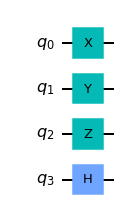

In [13]:
from qiskit import QuantumCircuit, Aer, execute # importálja a szükséges könyvtárakat
qc = QuantumCircuit(4) # Létrehozza az áramkört 4 kvantumbittel

qc.x(0) # A Pauli X kapu
qc.y(1) # A Pauli Y kapu
qc.z(2) # A Pauli Z kapu

qc.h(3) # Hadamard kapu

qc.draw(output="mpl") # Kirajzolja az áramkört

<h4>A CNOT kapu</h4>

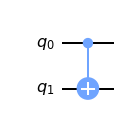

In [14]:
from qiskit import QuantumCircuit, Aer, execute # importálja a szükséges könyvtárakat
qc = QuantumCircuit(2) # Létrehozza az áramkört 4 kvantumbittel

qc.cx(0, 1) # A CNOT kapu, az 1. paraméter a kontrol; a 2. a cél bit

qc.draw(output="mpl") # Kirajzolja az áramkört

<h4>A Toffoli-kapu</h4>

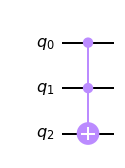

In [15]:
from qiskit import QuantumCircuit, Aer, execute # importálja a szükséges könyvtárakat
qc = QuantumCircuit(3) # Létrehozza az áramkört 4 kvantumbittel

qc.ccx(0, 1, 2) # A CNOT kapu, az 1. és a 2. paraméter a kontrol; a 3. a cél bit

qc.draw(output="mpl") # Kirajzolja az áramkört

<h4>Kidolgozott példa 1.</h4>
Mivel a Hadamard gate a $\ket{0}$ és az $\ket{1}$ egyenlő szuperpozícióját hozza létre, ha megmérjük a számitási bázisban, akkor áltagosan az esetek 50%-ban fogunk 1-et és 50%-ban fogunk 0-t mérni:

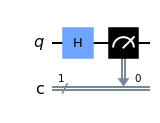

{'0': 504, '1': 520}


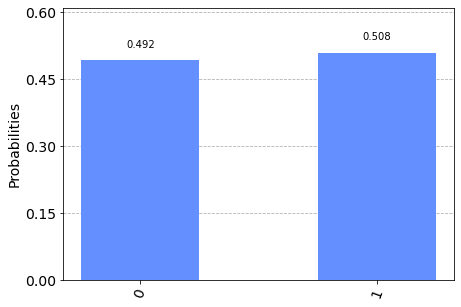

In [16]:
# importálja a szükséges könyvtárakat
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(1, 1) # Létrehozza az áramkört 1 kvantum és 1 klasszikus bittel

qc.h(0) # Hat egy X kapuval a 0. kvantumbiten

qc.measure(0, 0) # Hozzáad egy mérést a 0. kvantumbitet megméri, az eredményét eltárolja a 0. klasszikus bitben

display(qc.draw(output="mpl")) #Kirajzolja a mérés eredményét, a display() olyan mint a print() függvény, csak ez ábrákat is ki tud rajzolni

job = execute(qc, Aer.get_backend("aer_simulator")) # Létrehozza a folyamatot
counts = job.result().get_counts(qc) # Kinyeri a mérés eredményét
print(counts) # Kiírja a mérés eredményét
plot_histogram(counts) # Ábrázolja hosztogramon a mérés eredményét

<h4>Kidolgozott példa 2.</h4>
Hozzunk létre egy 3 kvantumbites áramkört! Az első kvantumbiten hass egy H kapuval; a másodikon egy H majd egy Z kapuval; a harmadikon egy H egy Z majd még egy H kapuval! Milyen állapotba kerültél? Vizsgáld meg ha az elején minden bitet $\ket{1}$ állapotba állítasz!

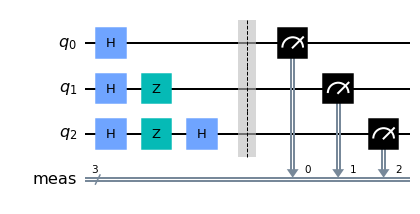

In [17]:
# Ide írhatod a megoldásodat
# importálja a szükséges könyvtárakat
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector # Elmenti az állapotvektort (csak az állapot megjelenítéséhez kell)

start_in_1 = False # Az 1 állapotban kezdünk-e

qc = QuantumCircuit(3) # Létrehozza az áramkört 3 kvantumbittel, itt nem adunk hozzá klasszikus regisztert

if start_in_1: # Ha az 1 állapotban kezfünk
    for i in range(3): # Végigmegy az összes qbiten
        qc.x(i) # Beállítja az i. bitet az 1 állapotba
    qc.barrier() # Berak egy elválasztót

# Az 1. bit: H
qc.h(0)

# A 2. bit: HZ
qc.h(1)
qc.z(1)

# A 3. bit: HZH
qc.h(2)
qc.z(2)
qc.h(2)

state = Statevector(qc) # Elmenti az állapotot

qc.measure_all() # Hozzáad egy mérést
# FONTOS: ha a mesure_all() függvényt használjuk nem kell az áramkör létrehozásakor hozzáadni a klasszikus regisztereket

display(qc.draw(output="mpl")) #Kirajzolja a mérés eredményét

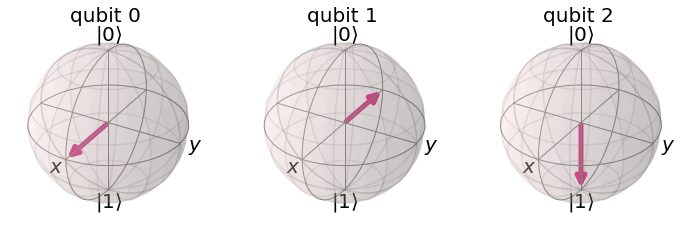

In [18]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(state)

{'101': 244, '110': 268, '111': 250, '100': 262}


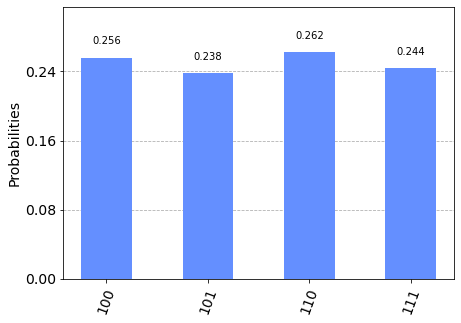

In [19]:
job = execute(qc, Aer.get_backend("aer_simulator")) # Létrehozza a folyamatot
counts = job.result().get_counts(qc) # Kinyeri a mérés eredményét
print(counts) # Kiírja a mérés eredményét
plot_histogram(counts)

A $q_2$ bit mindig az 1 állapotban van, a másik 2 bit azonban 50% eséllyel az 1 50%-kal a 0 állapotban van.

<h4>Kidolgozott példa 3.</h4>
Elkészíthetjük a swap (csere) kaput CNOT-kapuk segítségével is:

In [20]:
def encode(qc, n, msg):
    """
    A függvény, ami elkódolja az értéket n kvantumbiten
    Paraméter:
        qc: A kvantumáramkör, amire elkódoljuk az üzenetet (QuantumCircuit)
        n: Hány kvantumbiten kódolja el az üzenetet (int)
        msg: Az elkódolandó üzenet, lehet int
    Visszaad:
        qc: A kvantumáramkör az elkódolt üzenettel (QuantumCircuit)
    """
    if type(msg) != int: # Ha az üzenet nem int típusú
        raise ValueError(f"A(z) {msg} nem megfelelő üzenet! - csak egész számot lehet megadni") # Hibát ad
    if msg < 0 or msg >= 2**n: # Ha a szám nincs a megfelelő tartományban
        raise ValueError(f"A(z) {msg} nem megfelelő üzenet! - csak [0; 2^n] intervallumban lehet a szám") # Hibát ad
    msg = format(msg, f'0{n}b') # Bináris számmá konvertálja
    print("Eredeti üzenet:", msg) # Kiírja az üzenetet
            
    for i in range(n):
        if msg[i] == "1": # Ha az üzenet i. karaktere "1"
            qc.x(i) # Flippeli az i. bitet
    return qc # Visszaadja a kvantumáramkört

Eredeti üzenet: 01


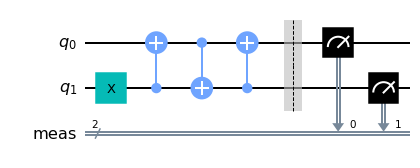

In [21]:
# importálja a szükséges könyvtárakat
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2)

qc = encode(qc, 2, 1)

qc.cx(1, 0)
qc.cx(0, 1)
qc.cx(1, 0)

qc.measure_all()

qc.draw(output="mpl")

In [22]:
job = execute(qc, Aer.get_backend("aer_simulator"))
counts = job.result().get_counts(qc)
print(counts)
print("A megfordított üzenet", list(counts.keys())[0][::-1])

{'01': 1024}
A megfordított üzenet 10


<h3>További hasznos linkek</h3>

<a href="https://qiskit.org/textbook/preface.html">Qiskit tankönyv</a> - Bemutatja a Qiskit használatát

<h2>Feladatok</h2>

<h4>1a. feladat</h4>
Készíts egy 1 kvantumbitet és 1 klasszikus bitet tartalmazó áramkört! A kvantumbiten hass az állapotra kettő X kapuval egymás után!

Mit vársz, mi lesz a bit állapota?

Futtasd le az áramkört 1024 alkalommal, írd ki a futtatás eredményét, és ábrázold hisztogrammon! Az eredmény megegyezik az általad várttal?

In [23]:
# Ide írhatod a megoldásodat

# Az áramkör elkészítése
# ...

# Az áramkör futtatása
# ...

# Az eredmények kiírása
# ...

<h4>1b. feladat</h4>
Készíts egy 1 kvantumbitet és 1 klasszikus bitet tartalmazó áramkört! A kvantumbiten hass az állapotra $k$ X kapuval egymás után! ($k$ értéke legyen változtatható, $k\in\mathbb{N}$)

Mit vársz, mi lesz a bit állapota az egyes esetekben? Keress mintázatot!

Futtasd le az áramkört 1024 alkalommal, írd ki a futtatás eredményét, és ábrázold hisztogrammon! Az eredmény megegyezik az általad várttal?

Ismételd meg a kísérletet több különböző $k$ esetén!

In [24]:
# Ide írhatod a megoldásodat

k = 3 # Itt lehet változtatni a 'k' értékét

# Az áramkör elkészítése
# ...

# Az áramkör futtatása
# ...

# Az eredmények kiírása
# ...

<h4>1+. feladat (haladó)</h4>
Mennyi az $XX$, $XXX$, $XX...X$ szorzatok eredménye?

Emlékeztető:

$$X \ket{0} = \ket{1}$$
$$X \ket{1} = \ket{0}$$

A feladatot megoldhatod papiron, vagy a notebookban python segítségével is.

*További gondolkodtató: a kvantumállapotokat vektorokkal, a kapukat mátrixokkal is le lehet írni, ekkor a műveleteket mátrixszorzás segítségével lehet elvégezni. Nézz utána az X kapu mátrixának, majd végezd el azzal is a számolást. Segítség: A matematikai számítások elvégzéséhez (pl. mátrixszorzáshoz) gyakran a numpy könyvtár függvényeit használjuk.*

In [25]:
# Ide írhatod a megoldásodat vagy papiron is elvégezheted
# ...

<h4>1++. feladat (haladó)</h4>
Készíts egy diagramot az előző kísérlet eredménye alapján! Az $x$ tengelyen a $k$ értéke legyen, az $y$ tengelyen a mérések eredménye. (Ne felejtsd el, hogy a diagramnak legyen címe, tengelyjelzet, jelmagyarázat, tengelybeosztás, mértékegység (ha van)!)

*Segítség: a diagramokat általában a matplotlib.pyplot könyvtár segítségével készítjük.*

In [26]:
# Ide írhatod a megoldásodat
# Grafikon elkészítése

<h4>2a. feladat</h4>
Készíts egy 4 kvantumbites áramkört! Az 1. biten hass egy X kapuval, a 2. biten 2-vel... a 4. biten 4 X kapuval.

Mit vársz, mi lesz a mérés eredménye? Futtasd le az áremkört 1024 alkalommal! Megegyezik a mérés eredménye az általad várttal?

In [27]:
# Ide írhatod a megoldásodat

# Az áramkör elkészítése
# ...

# Az áramkör futtatása
# ...

# Az eredmények kiírása
# ...

<h4>2b. feladat</h4>

Készíts egy 4 kvantumbites áramkört! Minden bit esetén dobj fel egy érmét (virtuálisan), ha az eredmény fej, hass a biten egy X kapuval, ha az eredmény írás, ne hass semmivel az adott biten! Rajzold ki az áramkört, gondold végig, hogy mi lesz a mérés eredménye (Figyelj, hogy a Qiskit lentről fölfelé számozza a kvantumbiteket!)!

Futtasd az áramkört 1024 alkalommal, írd ki a mérési eredmények gyakoriságát! Az a mérés eredménye amit vártál?

Ismételd meg a futtatást többször!

*Segítség: a véletlenszámgenráláshoz például a random.randint() vagy a numpy.random.rand() függvényeket használhatjuk*

In [28]:
# Ide írhatod a megoldásodat

# Az áramkör elkészítése
# ...

# Az áramkör futtatása
# ...

# Az eredmények kiírása
# ...

<h4>3a. feladat</h4>

Hozz létre egy 1 kvantumbites áramkört! Hass a qbiten $n$ Hadamard kapuval!

Mit gondolsz mi lesz a mérése végeredménye különböző $n$-ek esetén? Futtasd le az egyes áramköröket 1024 alkalommal különböző kapuszám esetén! A mérés eredménye megegyezik az általad várttal?

Hogyan változik a mérések eredménye, ha az $\ket{1}$ állapotból indul az áramkör?

In [29]:
# Ide írhatod a megoldásodat

n = 2 # A vantumbitek száma
kezdo_allpot = 0 # A kiindulási állapot 0=|0>, 1=|1>

# Az áramkör elkészítése
# ...

# Az áramkör futtatása
# ...

# Az eredmények kiírása
# ...

<h4>3b. feladat</h4>

Hozz létre egy 2 kvantumbites áramkört! Minden kvantumbiten hass egy Hadamard kapuval!

Mi lesz a mérés végeredménye! Futtasd le az áramkört 1024 alkalommal, az eredményt ábrázold hisztogramon! A mérés eredménye megegyezik az általad várttal?

In [30]:
# Ide írhatod a megoldásodat

# Az áramkör elkészítése
# ...

# Az áramkör futtatása
# ...

# Az eredmények kiírása
# ...

<h4>3c. feladat</h4>

Általánosítsd az előző feladatot $n$ kvantumbitre! Mi lesz a mérés eredménye? Vizsgáld meg különböző méretek esetén az eredmények változását!

In [31]:
# Ide írhatod a megoldásodat

n = 3 # A vantumbitek száma

# Az áramkör elkészítése
# ...

# Az áramkör futtatása
# ...

# Az eredmények kiírása
# ...

<h4>3+. feladat (haladó matematika)</h4>

Határozd meg a $HH$ és a $H\otimes H$ mátrixot! Mi a különbség a 2 között? Valósídtsd meg 1-1 kvantumáramkörön mindekettőt!

Határozd meg a $H\otimes H\ket{00}$ vektort!

Emlékeztető:

$$H\ket{0}=\ket{+}.$$
$$H\ket{1}=\ket{-}.$$

Továbbá:
$$H\ket{+}=\ket{0}.$$
$$H\ket{-}=\ket{1}.$$

A feladatot megoldhatod papiron, vagy a notebookban python segítségével is.

*Rávezetés: a matematikai számítások elvégzéséhez (pl. mátrixszorzás, tenzorszorzás) gyakran a numpy könyvtár függvényeit használjuk*

In [32]:
# Ide írhatod a megoldásodat vagy papiron is elvégezheted
# ...

<h4>4+. feladat</h4>

Bizonyítsd be a $Z=HXH$ és az $X=HZH$ azonosságot!

*Segítség: használhatsz mátrixszorzást, vagy készíthetsz kvantumáramköröket és megvizsgálhatod a hatásukat bizonyos kiindulási állapotokon.*

In [33]:
# Megoldhatod itt vagy papiron is

<h4>5. feladat</h4>

Készíts egy 3 kvantumbites áramkört! Valósítsd meg, hogy az áramkör az 1. és a 3. kvantumbiten egy swap (csere) kapuval hasson (Használj CNOT-kapukat)!

*Segítség: az ellenörzéshez felhasználhadot az encode() függvényt*

In [34]:
def encode(qc, n, msg):
    """
    A függvény, ami elkódolja az értéket n kvantumbiten
    Paraméter:
        qc: A kvantumáramkör, amire elkódoljuk az üzenetet (QuantumCircuit)
        n: Hány kvantumbiten kódolja el az üzenetet (int)
        msg: Az elkódolandó üzenet, lehet int
    Visszaad:
        qc: A kvantumáramkör az elkódolt üzenettel (QuantumCircuit)
    """
    if type(msg) != int: # Ha az üzenet nem int típusú
        raise ValueError(f"A(z) {msg} nem megfelelő üzenet! - csak egész számot lehet megadni") # Hibát ad
    if msg < 0 or msg >= 2**n: # Ha a szám nincs a megfelelő tartományban
        raise ValueError(f"A(z) {msg} nem megfelelő üzenet! - csak [0; 2^n] intervallumban lehet a szám") # Hibát ad
    msg = format(msg, f'0{n}b') # Bináris számmá konvertálja
    print("Eredeti üzenet:", msg) # Kiírja az üzenetet
            
    for i in range(n):
        if msg[i] == "1": # Ha az üzenet i. karaktere "1"
            qc.x(i) # Flippeli az i. bitet
    return qc # Visszaadja a kvantumáramkört

In [35]:
# Ide írhatod a megoldásodat
# ...

<h4>5+. feladat</h4>

Általánosítds az előző feladat megoldását $n$ kvantumbitre! Hozz létre egy $n$ kvantumbites áramkört, majd az áramkör hajtson végre úgy cseréket, hogy az eredetileg elkódolt üzenet megfordúljon (pl.: 0001 -> 1000)

In [36]:
# Ide írhatod a megoldásodat

n = 4
# ...

<h4>6. feladat</h4>

<i>A 2b. feladat alapján.</i>

Készíts egy 4 kvantumbites áramkört! Minden bit esetén dobj fel egy érmét (kvantumosan*), ha az eredmény fej, hass a biten egy X kapuval, ha az eredmény írás, ne hass semmivel az adott biten! Rajzold ki az áramkört!
Futtasd az áramkört 1024 alkalommal, írd ki a mérési eredmények gyakoriságát!

*A kvantumos érmefeldobás azt jelenti, hogy a dobás eredményét egy második kvantumáramkör mérése alapján határozza meg. (Például egy 4 kvantumbites áramkör, ahol minden biten egy H kapuval hatottál, 1 mérés (shot) után lesz 4 véletlen számod, az alapján hass az eredeti áramkörön.)

Ismételd meg a futtatást többször!

In [37]:
# Ide írhatod a megoldásodat
# ...